<center><img src='img/ms_logo.jpeg' height=40% width=40%></center>

<center><h1>Single Layer Perceptrons</h1></center>

In our first notebook for this course, we'll begin by exploring the concept that started it all for neural networks: the **_Perceptron_**.  We start by exploring the the biological inspiration of the perceptron model to gain an intuition for how it works, and then we'll build one from scratch using python and numpy!


<center><h3>What is a Perceptron?</h3></center>

The **_Perceptron_** is a simple supervised learning algorithm used for binary classification. It was invented by psychologist and researcher Dr. Frank Rosenblatt in 1960.  Frank's goal was to study how the brain learned, and the perceptron was easily his most famous and most successful experiment.  By studying neurons in the brain, Dr. Rosenblatt realized he could use electronics to simulate what a neuron does, and more importantly, build a model that gets better with practice by "learning" from mistakes! 

Nowadays, the word "perceptron" refers to an algorithm.  However, the first perceptron was not a program but a fully functional machine consisting of wires, photocells, potentiometers, and a camera.  Dr. Rosenblatt called this machine the _Mark I Perceptron_, and the name stuck.  The machine was used for image classification, and is generally considered the forerunner to modern Artifical Intelligence.  The work done by Dr. Rosenblatt was considered so important that the IEEE gives out a prestigious [Frank Rosenblatt Award](https://www.ieee.org/about/awards/tfas/rosenblatt.html) for "outstanding contributions to biologically and linguistically motivated computational paradigms and systems."

<center><img src='img/perceptron.jpg'></center>
<center>The Mark I Perceptron Machine</center>

<br>
<br>
<center><h3>Neurons and Perceptrons</h3></center>

To understand how perceptrons work, we'll first look at the biological structure that inspired it--the **_neuron_**!  The brain consists of special types of cells called neurons--the average human brain contains over 100 billion. Everything that you perceive, think, or do can be traced back to electrical impulses between connected neurons in your brain.  Neurons pass informaiton along by receiving electrical impulses from other neurons--if the sum of these incoming impulses is greater than the receiving neuron's **_activation threshold_**, a tipping point is reached and the neuron "fires", passing it's own electrical impulse along to other neurons it is connected to.  Importantly, these neurons only pass their messages in one direction--this is typically referred to as "feed-forward". They have an input side, and an output side.  

<center><img src='img/neuron_diagram.jpg'></center>
<center>Inputs enter through Dendrites on the left.  When the neuron fires, output travels through the Axon Terminals on the right.</center>

<center><h3>Some Inputs Are Better Than Others</h3></center>

In both perceptrons and neurons, an important distinction is that every neuron has different weights for the neurons passing it input.  This makes intuitive sense--when someone gives you good advice, you tend to listen to them more often, and allow their input to more heavily influence your decisions.  Alternatively, when someone gives you bad advice, it makes sense to give their advice less weight in future decisions (or, if they are consistently wrong, just do the opposite!).  This brings us to a more formal description of how perceptrons work:

Perceptrons take in multiple inputs, which each have different weights assigned to them.  The perceptron computes the weighted sum of the inputs, and checks to see if this sum is greater than it's activation threshold.  If the sum is greater than or equal to the threshold, the perceptron fires (returns `True`)--otherwise, it does not fire (returns `False`). In code, a step activation 

If you've been paying attention, you've likely asked yourself a very important question--**_how do we pick good weights for each of our inputs?!_**  The answer is simpler than it may seem.  We could always just set the weights ourselves and leave them, but that isn't a good idea--what if we don't know what the weights should be?  It turns out, our best bet is to intialize them **_randomly_**, and then let them shift around as the perceptron **_learns the correct weights_** by looking at the data, making predictions, and paying attention to what it gets right and wrong.



<center><h2>Building Our Perceptron</h2></center>

Let's get started on building our Perceptron class.  We'll start by defining a Perceptron class.  

Our `Perceptron` class should take two arguments:

**_weights_**: a vector of weights, which will be used to calculate the weighted sum of inputs during the `activate()` function.  This vector should be passed in at instantiation. 

**_activation threshold_**: The activation threshold for the perceptron.  This will also be used during the `activate()` function.  This is a float value, which should be passed in at instantiation.  


Let's look at the methods for our `Perceptron` class:

**_`activate(inputs)`_**:  This method will compute the weighted sum of the inputs parameter, by computing the dot product of `inputs` and `self.weights`.  If the sum is greater than or equal to `self.activation_threshold`, the method should return 1.  Otherwise, it should return 0.  

**_`update_weights()`_**: This method "trains" our perceptron, to help us find the most effective weights.  This method uses the **_Perceptron Learning Rule_** to update the weights every time the perceptron gets something wrong. 

In [109]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, weights, activation_threshold):
        self.weights = weights
        self.activation_threshold = activation_threshold
        
        
    def activate(self, inputs):
        '''Checks if dot product of inputs and weights are greater than the activation
        threshold.  If so, perceptron fires by returning 1. Otherwise, returns 0.
        '''

        total = np.sum(np.dot(inputs, self.weights))
        if total >= self.activation_threshold:
            return 1
        else:
            return 0
        
    def update_weights(self, actual, expected, eta=.1):
        '''Uses perceptron learning rule to update weights based on performance of prediction.  
            
            actual: The instances the perceptron will make predictions on.
            expected: The ground truth labels for each instance in 'actual'
            eta: The learning rate for weight updates.  This is a scalar values used to
                shrink the amount that the weights will be updated by.  
        '''
        
        for index, value in enumerate(actual):
            p = self.activate(value)   # get perceptron's prediction for this instance
            error = expected[index] - p  # Compute error rate (error of 0 means it got it right, so weights should not be updated)
            self.weights += eta * error * value # update weights

In [110]:
import random
# Load the libraries you will need
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.linear_model import perceptron
from pandas import *
 
# You only need this if using Notebook
%matplotlib inline

In [111]:
weights = []
for _ in range(2):
    weight = random.uniform(-1, 1)
    weights.append(wight)

In [112]:
# Put some data into a dataframe
inputs = DataFrame({
'A' : [2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5],
'B' : [2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7],
'Targets' : [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]
})

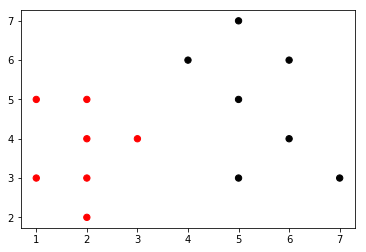

In [113]:
# Set an array of colours, we could call it
# anything but here we call is colormap
# It sounds more awesome
colormap = np.array(['r', 'k'])
 
# Plot the data, A is x axis, B is y axis
# and the colormap is applied based on the Targets
plt.scatter(inputs.A, inputs.B, c=colormap[inputs.Targets], s=40)

In [128]:
perceptron = Perceptron(weights, 0)

(0, 8)

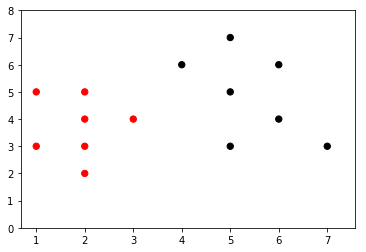

In [129]:
# Plot the original data
plt.scatter(inputs.A, inputs.B, c=colormap[inputs.Targets], s=40)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = perceptron.weights
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx -  perceptron.activation_threshold / w[1]
 
# Plot the hyperplane
plt.plot(xx,yy, 'k-')
plt.ylim([0,8]) # Limit the y axis size

In [130]:
perceptron.update_weights(inputs[['A', 'B']].values, inputs[['Targets']].values)

(0, 8)

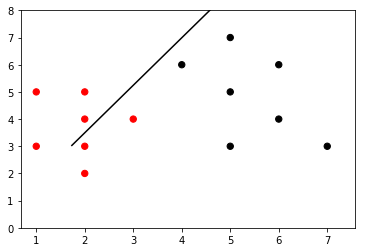

In [131]:
# Plot the original data
plt.scatter(inputs.A, inputs.B, c=colormap[inputs.Targets], s=40)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = perceptron.weights
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx -  perceptron.activation_threshold / w[1]
 
# Plot the hyperplane
plt.plot(xx,yy, 'k-')
plt.ylim([0,8]) # Limit the y axis size

In [127]:
perceptron.weights

array([ 1.09968189,  0.79968189])